In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('D:\\Datasets\\Linear regression\\ISL-linear-regression-master\\data\\Advertising.csv')

# Data Analysis And Data Visualization

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [5]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
#Unnamed:0 is not important column so we will drop it
data.drop('Unnamed: 0',axis = 1, inplace = True)

In [7]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
#Normalize the data for better results
data_std = (data/data.mean())/data.std()
data_std.head()

,TV,radio,newspaper,sales
0,0.018227,0.109440,0.103994,0.302070
1,0.003525,0.113782,0.067776,0.142151
2,0.001362,0.132891,0.104144,0.127116
3,0.012001,0.119573,0.087914,0.252864
4,0.014322,0.031268,0.087764,0.176322


In [9]:
data_std.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,0.011648,0.067355,0.045917,0.191664
std,0.006801,0.042985,0.032729,0.071314
min,0.000055,0.000000,0.000451,0.021869
25%,0.005891,0.028880,0.019161,0.141809
50%,0.011862,0.066301,0.038697,0.176322
75%,0.017334,0.105748,0.067776,0.237829
max,0.023479,0.143603,0.171319,0.369045


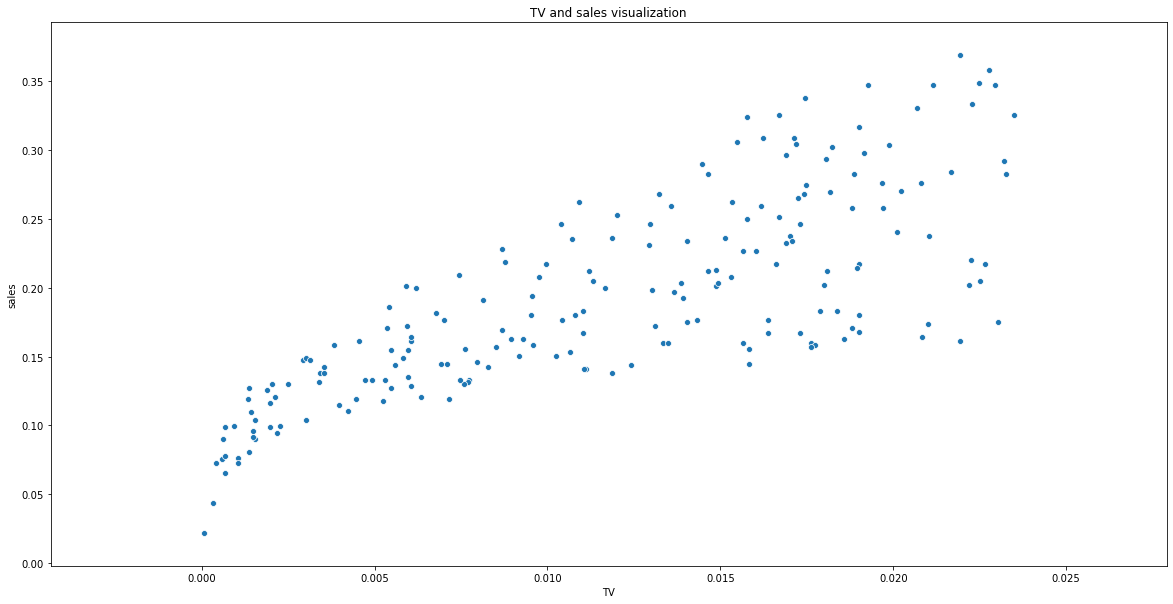

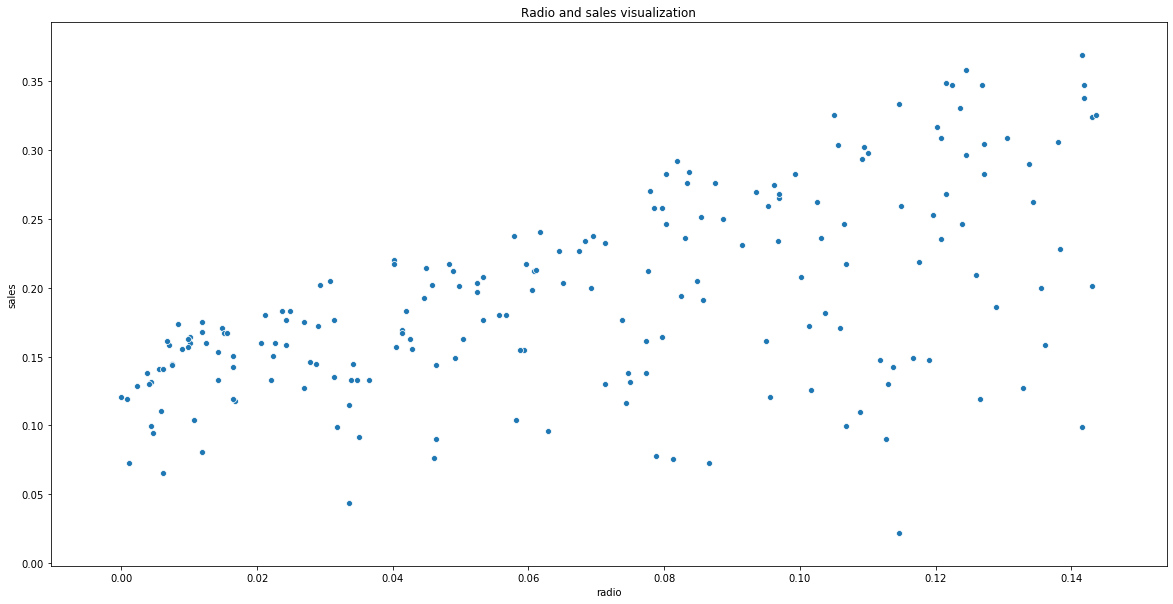

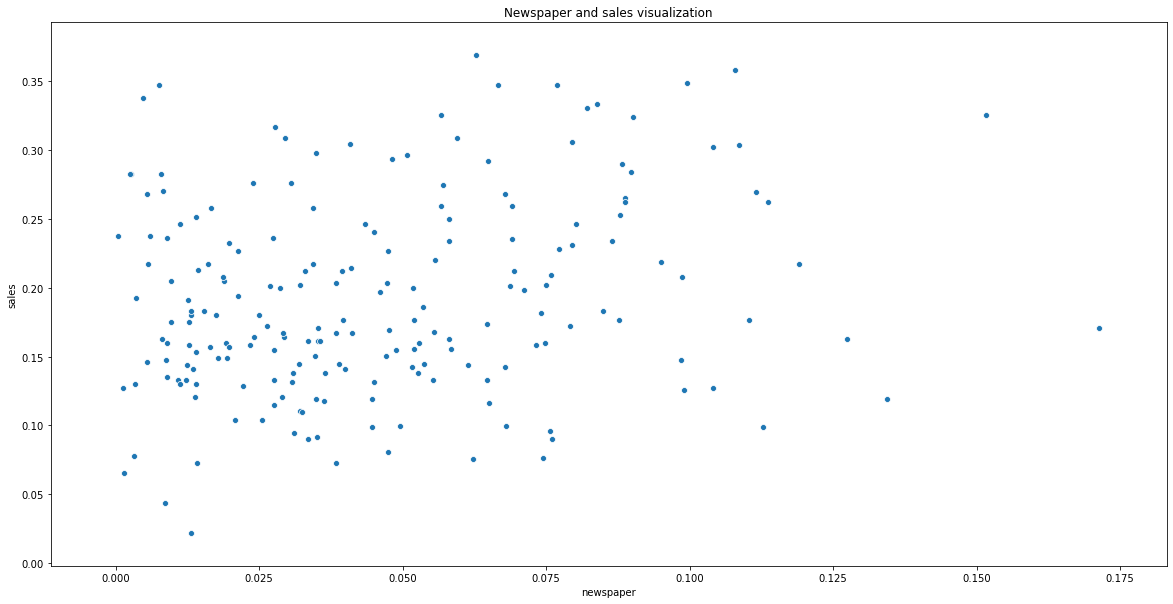

In [10]:
#Now we will visualize the relation between independent variables and Sales
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'TV', y='sales', data=data_std).set(title = "TV and sales visualization")
plt.show()
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'radio', y='sales', data=data_std).set(title = "Radio and sales visualization")
plt.show()
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'newspaper', y='sales', data=data_std).set(title = "Newspaper and sales visualization")
plt.show()

-> As TV variable is increasing sales variable is also increasing therefore TV can help in predicting sales

-> As radio variable is increasing sales variable is also increasing therefore radio can help in predicting sales but there is noise too

-> As newspaper variable is increasing sales variable is also increasing therefore newspaper can help in predicting sales but newspaper is help least

# Linear Regression

In [11]:
#NOW we will one by one fit the data on independent variable
x = data[['TV','radio','newspaper']]
y = data['sales']

In [12]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


# Simple Linear Regression 

In [13]:
#coverting y into 2d array .reshape(-1,1) will convert y into 2d array of (n,1) shape
y = y.values.reshape(-1,1)

In [14]:
x1 = x['TV'].values.reshape(-1,1)
x2 = x['radio'].values.reshape(-1,1)
x3 = x['newspaper'].values.reshape(-1,1)

Now importing Linear Regression Libraries we are using sklearn there are other libraries too

In [15]:
#Now making liner regression model
from sklearn.linear_model import LinearRegression
#train and test split is to split dataset into train and test sets
from sklearn.model_selection import train_test_split

In [16]:
#Saving out model in variable m
m = LinearRegression()

# 1. Simple Linear Regression for Tv 

In [17]:
#test_size will decide out train and test split size 
#random state will decide how much randomly our values will be choose for test and train set
xtrain , xtest,ytrain,ytest = train_test_split(x1,y,random_state = 10 ,test_size = 0.3,shuffle = True)

In [18]:
m.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
ypred1 = m.predict(xtest)

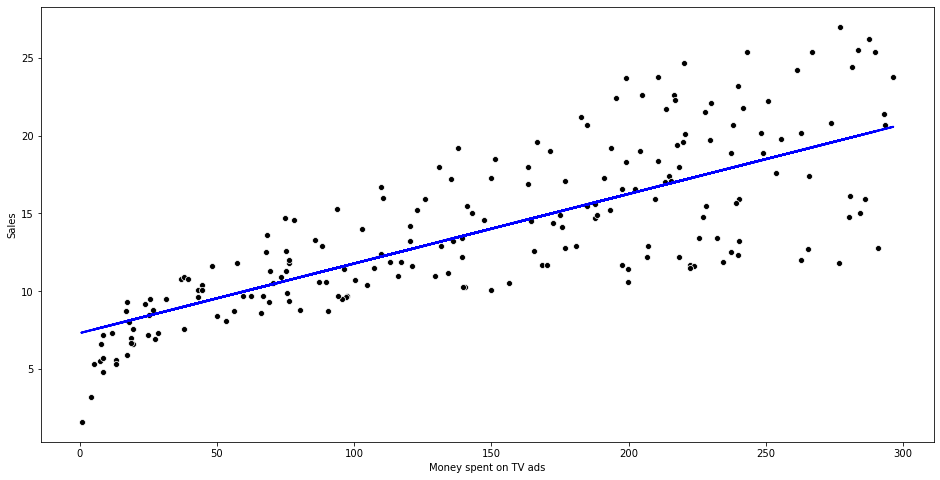

In [20]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data['TV'],
    data['sales'],
    color='black'
)
plt.plot(
    xtest,
    ypred1,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads")
plt.ylabel("Sales")
plt.show()

The Blue line shows how the model has fit acoording to the given data

# 2. Simple Linear Regression for Radio

In [21]:
xtrain , xtest,ytrain,ytest = train_test_split(x2,y,random_state = 10 ,test_size = 0.3,shuffle = True)

In [22]:
m.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
ypred2 = m.predict(xtest)

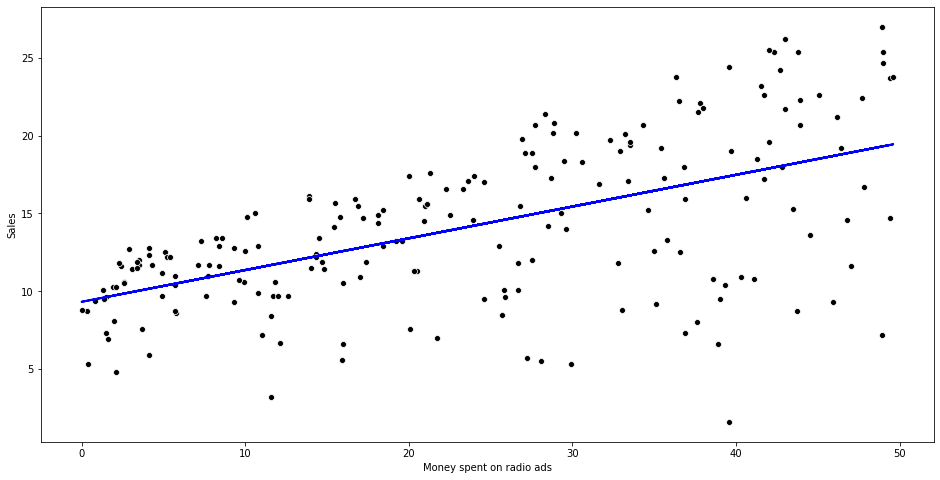

In [24]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data['radio'],
    data['sales'],
    color='black'
)
plt.plot(
    xtest,
    ypred2,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on radio ads")
plt.ylabel("Sales")
plt.show()

# 3. Simple Linear Regression for Newspaper

In [25]:
xtrain , xtest,ytrain,ytest = train_test_split(x3,y,random_state = 10 ,test_size = 0.3,shuffle = True)

In [26]:
m.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
ypred3 = m.predict(xtest)

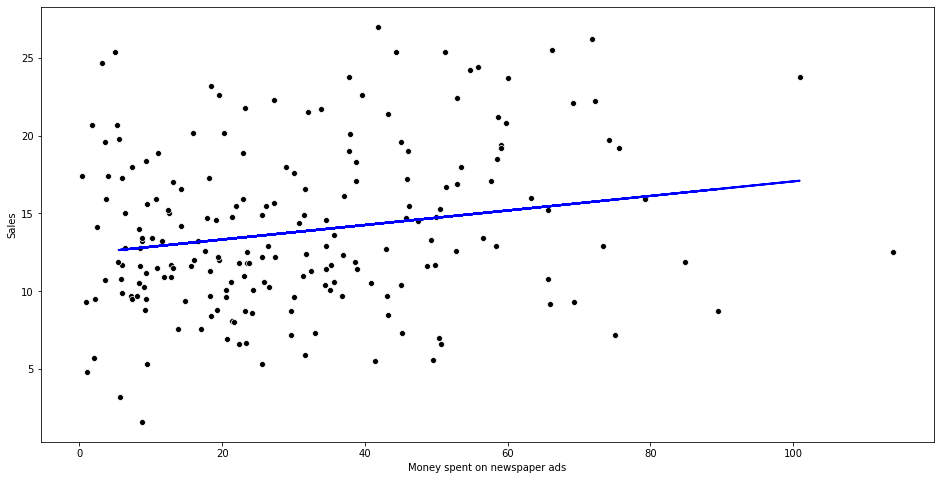

In [28]:
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data['newspaper'],
    data['sales'],
    color='black'
)
plt.plot(
    xtest,
    ypred3,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on newspaper ads")
plt.ylabel("Sales")
plt.show()

# Multiple Linear Regression

In [29]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 10,test_size = 0.3)

In [31]:
m.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
ypred = m.predict(xtest)

In [33]:
print(m.intercept_)
print(m.coef_)

[3.41064159]
[[ 0.04303172  0.19352212 -0.00386729]]


In [36]:
#Return the coefficient of determination R^2 of the prediction.
m.score(xtest,ypred)

1.0

We cant visualize the the prediction of multiple variables on a 2d graph therefore visualization is not performed